**Kaggle** 

kernel con normalización https://www.kaggle.com/selener/prediction-of-credit-card-default



kernels: https://www.kaggle.com/lucabasa/credit-card-default-a-very-pedagogical-notebook



Sobre Matrix de confusion y selección de variables 
https://www.kaggle.com/gpreda/default-of-credit-card-clients-predictive-models


# **Experimentos**

Incluya una sesion dentro de su informe con el nombre Experimentos, en la cual describa la metodología de validacion usada y la base de datos que est  ́ a usandó para llevar a cabo el proyecto, incluyendo la fuente de la base de datos como referencia, el numero de muestras,variables, etc. Si su problema es de clasificacion, indique cuantas clases contiene la basa de datos y cu  ́ antas muestras por clase. Si la base de datos esta desbalanceada,deben considerar el uso de tecnicas de submuestreo y sobremuestreo inteligente, ademas de usar validacíón ́estratificaida.

In [1]:
from pandas import DataFrame, read_csv
#import pickle
from sklearn.externals import joblib #Guardar modelos una vez entrenados
import numpy as np

import matplotlib.pyplot as plt

import pandas as pd 
import seaborn as sns
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,roc_curve,auc

PATH = '../'

In [2]:
file = PATH+'UCI_Credit_Card.csv'
df = pd.read_csv(file)

# Sobre la base de datos

In [3]:
df.sample(5)

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
4441,4442,50000.0,1,2,1,49,0,0,0,0,...,10679.0,10734.0,11550.0,1168.0,1500.0,1000.0,1000.0,1000.0,1000.0,0
5877,5878,280000.0,2,1,2,27,-2,-2,-2,-2,...,8164.0,0.0,1133.0,0.0,0.0,8169.0,0.0,231133.0,3300.0,0
4919,4920,350000.0,2,1,2,31,2,0,0,0,...,143142.0,160442.0,98479.0,100000.0,200000.0,0.0,135000.0,0.0,100000.0,0
11605,11606,170000.0,2,2,1,34,-1,-1,-1,-1,...,326.0,652.0,326.0,326.0,326.0,326.0,652.0,0.0,326.0,0
291,292,50000.0,2,2,2,22,1,-2,-2,-2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1


## **Variables**
**SEX: Gender**
1 = male 
2 = female

**EDUCATION:**

1 = graduate school 
2 = university 
3 = high school 
4 = others 
5 = unknown 
6 = unknown






**MARRIAGE**: Marital status
1 = married
2 = single
3 = others



**PAY_0,2,3,4,5,6: **Repayment status in September 2005, August 2005, July 2005, June 2005, May 2005, April 2005 (respectivey)

-2= no consumption
-1= pay duly
1 = payment delay for one month
2 = payment delay for two months
... 
8 = payment delay for eight months
9 = payment delay for nine months and above


**Cantidad de muestras**

In [4]:
df = df.rename(columns={'default.payment.next.month': 'def_pay', 
                        'PAY_0': 'PAY_1'})
data = df.values
data.shape

(30000, 25)

Cantidad de clases

In [5]:
len(np.unique(df.def_pay))

2

Muestras por clases

In [6]:
classes = np.unique(df.def_pay)
unicos = data[:,-1]
unos = np.where(unicos == 1)
lenU =len(unos[0])
cero = np.where(unicos == 0)
lenC=len(cero[0])
print("Clase (1):",lenU)
print("Clase (0):",lenC)

Clase (1): 6636
Clase (0): 23364


In [7]:
#!pip install --upgrade matplotlib
#!conda install ipykernel=4.9.0 -y

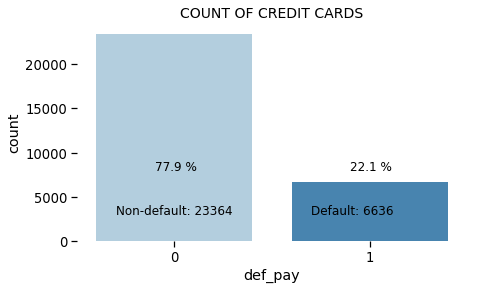

In [8]:
# The frequency of defaults
%matplotlib inline

yes = df.def_pay.sum()
no = len(data)-yes

# Percentage
yes_perc = round(yes/len(df)*100, 1)
no_perc = round(no/len(df)*100, 1)

import sys 
plt.figure(figsize=(7,4))
sns.set_context('notebook', font_scale=1.2)
sns.countplot('def_pay',data=df, palette="Blues")
plt.annotate('Non-default: {}'.format(no), xy=(-0.3, 15000), xytext=(-0.3, 3000), size=12)
plt.annotate('Default: {}'.format(yes), xy=(0.7, 15000), xytext=(0.7, 3000), size=12)
plt.annotate(str(no_perc)+" %", xy=(-0.3, 15000), xytext=(-0.1, 8000), size=12)
plt.annotate(str(yes_perc)+" %", xy=(0.7, 15000), xytext=(0.9, 8000), size=12)
plt.title('COUNT OF CREDIT CARDS', size=14)
#Removing the frame
plt.box(False);


Cantidad de variables y su significado

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
ID           30000 non-null int64
LIMIT_BAL    30000 non-null float64
SEX          30000 non-null int64
EDUCATION    30000 non-null int64
MARRIAGE     30000 non-null int64
AGE          30000 non-null int64
PAY_1        30000 non-null int64
PAY_2        30000 non-null int64
PAY_3        30000 non-null int64
PAY_4        30000 non-null int64
PAY_5        30000 non-null int64
PAY_6        30000 non-null int64
BILL_AMT1    30000 non-null float64
BILL_AMT2    30000 non-null float64
BILL_AMT3    30000 non-null float64
BILL_AMT4    30000 non-null float64
BILL_AMT5    30000 non-null float64
BILL_AMT6    30000 non-null float64
PAY_AMT1     30000 non-null float64
PAY_AMT2     30000 non-null float64
PAY_AMT3     30000 non-null float64
PAY_AMT4     30000 non-null float64
PAY_AMT5     30000 non-null float64
PAY_AMT6     30000 non-null float64
def_pay      30000 non-null int64
dtypes: float64

## **Feature engineering**

Los datos ya se han codificado y limpiado. Sin embargo, algunos datos categóricos tienen categorías repetidas. Por ejemplo, la variable "educación" tiene tres categorías con información similar: 4: others, 5: unknown, and 6: unknown

Por lo tanto  Las categorías 4: otras, 5: desconocidas y 6: desconocidas se pueden agrupar en una sola clase '4'.
  

In [10]:
df['EDUCATION'].unique()

array([2, 1, 3, 5, 4, 6, 0])

In [11]:
#Reemplazamos los valores 

df['EDUCATION']=np.where(df['EDUCATION'] == 5, 4, df['EDUCATION'])
df['EDUCATION']=np.where(df['EDUCATION'] == 6, 4, df['EDUCATION'])
df['EDUCATION']=np.where(df['EDUCATION'] == 0, 4, df['EDUCATION'])

df['EDUCATION'].unique()



array([2, 1, 3, 4])

la columna 'matrimonio' ​​debe tener tres categorías: 1 = casado, 2 = soltero, 3 = otros, pero contiene una categoría '0' que se unirá a la categoría '3'.

In [12]:
df['MARRIAGE'].unique()


array([1, 2, 3, 0])

In [13]:
df['MARRIAGE']=np.where(df['MARRIAGE'] == 0, 3, df['MARRIAGE'])
df['MARRIAGE'].unique()

array([1, 2, 3])

# **Escala de las variables, por lo tanto debemos normalizar**


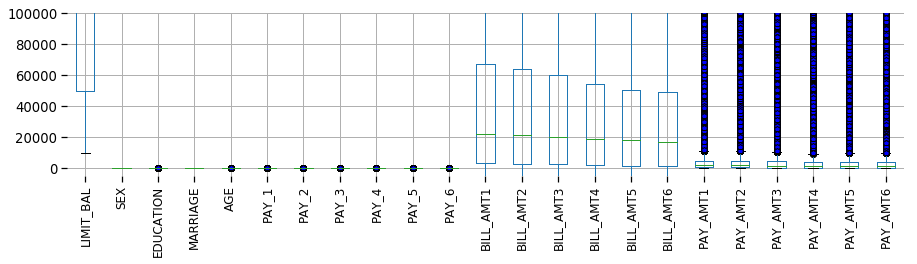

In [14]:

## data are distributed in a wide range (below), need to be normalizded.
df.drop('ID', axis = 1, inplace =True) # drop column "ID"
features = df.drop('def_pay', axis = 1, inplace = False)
plt.figure(figsize=(15,3))
ax= df.drop('def_pay', axis=1).boxplot(df.columns.name, rot=90)
outliers = dict(markerfacecolor='b', marker='p')
ax= features.boxplot(features.columns.name, rot=90, flierprops=outliers)
plt.xticks(size=12)
ax.set_ylim([-5000,100000])
plt.box(False);

**Creamos la variable a predecir**

In [15]:
Y = df['def_pay'].copy()


# **Normalización**

## **StandardScaler**

The standard score of a sample x is calculated as:

z = (x - u) / s

La idea detrás de StandardScaler es que transformará sus datos de modo que su distribución tenga un valor medio 0 y una desviación estándar de 1.




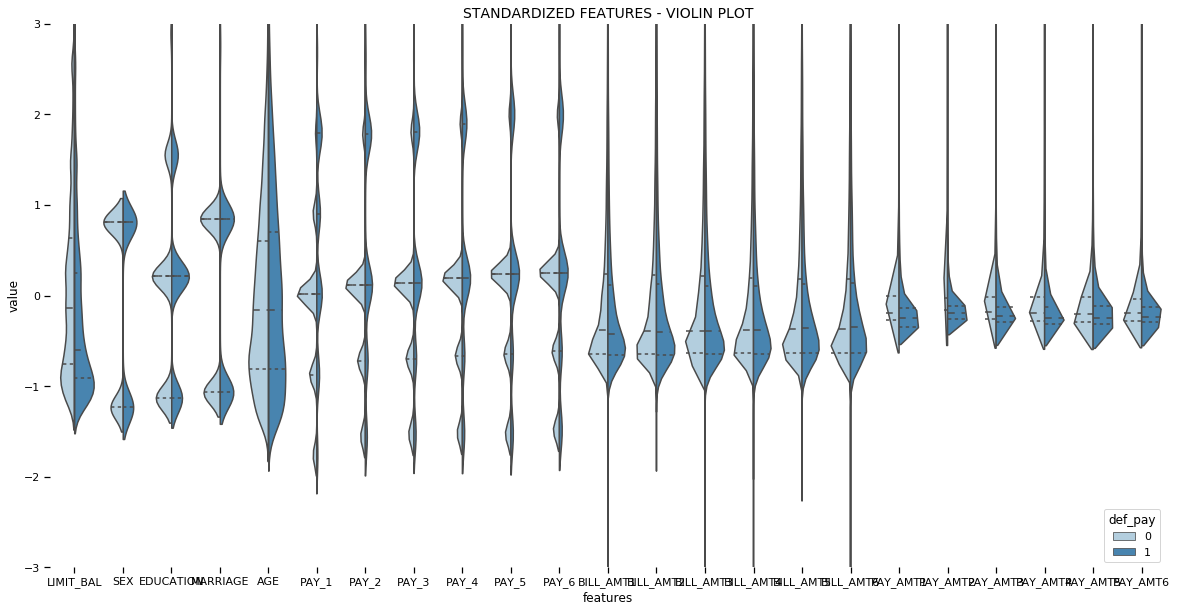

In [16]:
  # standardization

stdX = (features - features.mean()) / (features.std())    
X = stdX
data_st = pd.concat([Y,stdX.iloc[:,:]],axis=1)
data_st = pd.melt(data_st,id_vars="def_pay",
                    var_name="features",
                    value_name='value')
plt.figure(figsize=(20,10))
sns.set_context('notebook', font_scale=1)
sns.violinplot(y="value", x="features", hue="def_pay", data=data_st,split=True, 
               inner="quart", palette='Blues')
plt.legend(loc=4, title= 'def_pay')
plt.ylim([-3,3])
plt.title('STANDARDIZED FEATURES - VIOLIN PLOT', size=14)
plt.box(False)
plt.savefig('ImageName', format='png', dpi=200, transparent=False);

# **Variables Normalizadas**

In [17]:
stdX.sample(5)

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
12071,-0.905483,0.810147,0.211866,-1.068779,-1.029030,0.014860,0.111734,0.138862,0.188743,-0.647554,...,-0.353574,-0.662227,-0.630497,-0.638676,-0.256747,-0.185373,-0.296796,-0.181734,-0.314131,-0.219126
16415,-0.905483,0.810147,-1.131327,0.849116,0.055815,0.904697,1.782318,1.809891,1.899404,1.999846,...,-0.378463,-0.359489,-0.304445,-0.294804,-0.251374,-0.191884,-0.296796,-0.180394,-0.314131,-0.237126
4804,-0.905483,-1.234302,0.211866,-1.068779,0.272784,0.014860,0.111734,0.138862,0.188743,0.234913,...,-0.387201,-0.353007,-0.351635,-0.336110,-0.221187,-0.170183,-0.240001,-0.244226,-0.248679,-0.180875
9435,-0.674265,-1.234302,1.555060,0.849116,0.815207,1.794534,1.782318,0.138862,0.188743,-0.647554,...,0.458848,-0.476987,-0.360796,-0.253648,-0.160450,-0.029129,-0.294922,0.868427,1.253059,1.307357
15727,-0.905483,0.810147,0.211866,0.849116,-1.462968,0.014860,0.111734,0.138862,0.188743,-0.647554,...,0.046271,-0.361401,-0.009711,-0.140137,-0.203075,-0.170183,-0.201266,2.360306,-0.231596,-0.225876


In [18]:
X.shape

(30000, 23)

#Guardamos las variables normalizadas

In [19]:
#X.to_csv(PATH+"featuresSTD.csv",index=False)

In [20]:
PathFeaturesSTD = PATH+'featuresSTD.csv'
X = pd.read_csv(PathFeaturesSTD)

In [21]:
X.shape

(30000, 23)

In [22]:
X.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
0,-1.136701,0.810147,0.211866,-1.068779,-1.245999,1.794534,1.782318,-0.696652,-0.666588,-1.530021,...,-0.667982,-0.672486,-0.663047,-0.652713,-0.341936,-0.227082,-0.296796,-0.308057,-0.314131,-0.293377
1,-0.365974,0.810147,0.211866,0.849116,-1.029030,-0.874977,1.782318,0.138862,0.188743,0.234913,...,-0.639244,-0.621626,-0.606219,-0.597956,-0.341936,-0.213584,-0.240001,-0.244226,-0.314131,-0.180875
2,-0.597192,0.810147,0.211866,0.849116,-0.161154,0.014860,0.111734,0.138862,0.188743,0.234913,...,-0.482400,-0.449723,-0.417181,-0.391623,-0.250287,-0.191884,-0.240001,-0.244226,-0.248679,-0.012122
3,-0.905483,0.810147,0.211866,-1.068779,0.164300,0.014860,0.111734,0.138862,0.188743,0.234913,...,0.032846,-0.232369,-0.186726,-0.156576,-0.221187,-0.169358,-0.228641,-0.237842,-0.244162,-0.237126
4,-0.905483,-1.234302,0.211866,-1.068779,2.333990,-0.874977,0.111734,-0.696652,0.188743,0.234913,...,-0.161186,-0.346991,-0.348131,-0.331476,-0.221187,1.335012,0.271161,0.266429,-0.269034,-0.255183


# **Correlación entre variables**





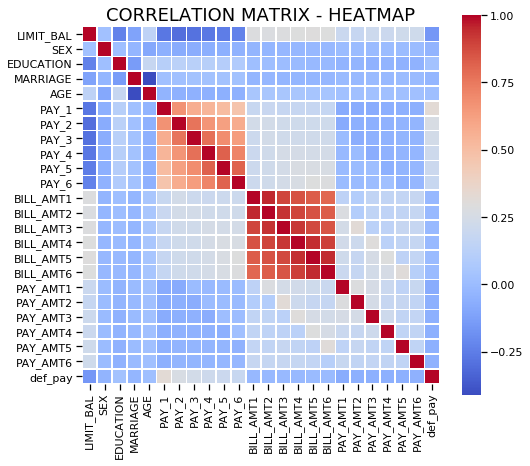

In [23]:
#  looking at correlations matrix, defined via Pearson function  
corr = df.corr() # .corr is used to find corelation
f,ax = plt.subplots(figsize=(8, 7))
sns.heatmap(corr, cbar = True,  square = True, annot = False, fmt= '.1f', 
            xticklabels= True, yticklabels= True
            ,cmap="coolwarm", linewidths=.5, ax=ax)
plt.title('CORRELATION MATRIX - HEATMAP', size=18);

La única característica con una notable correlación positiva con la variable  "Default" es el estado de pago durante el último mes (septiembre). 

La correlación negativa más alta con el incumplimiento se produce con Limit_Balance, lo que indica que los clientes con un saldo límite más bajo tienen más probabilidades de incumplimiento. También se puede observar que algunas variables están altamente correlacionadas entre sí, ese es el caso del monto del estado de cuenta y el estado de reembolso en diferentes meses.


El heatmat muestra que las características están correlacionadas entre sí (colinealidad), como PAY_0,2,3,4,5,6 y BILL_AMT1,2,3,4,5,6. En esos casos, la correlación es positiva.

# **Tecnicas de Balanceo Usada**

Si la base de datos esta desbalanceada,deben considerar el uso de tecnicas de submuestreo y sobremuestreo inteligente, ademas de usar validacíón ́estratificaida.

## **Stratified KFold**

In [24]:
from sklearn.model_selection import StratifiedKFold

#Train, Validation, Test
FOLDS = 10

skf = StratifiedKFold(n_splits=FOLDS)
for train_index, test_index in skf.split(X, Y):
    print("TRAIN:", train_index, "TEST:", test_index)
  



TRAIN: [ 2993  2995  2996 ... 29997 29998 29999] TEST: [   0    1    2 ... 3004 3005 3006]
TRAIN: [    0     1     2 ... 29997 29998 29999] TEST: [2993 2995 2996 ... 6044 6045 6047]
TRAIN: [    0     1     2 ... 29997 29998 29999] TEST: [5985 5988 5989 ... 9034 9035 9036]
TRAIN: [    0     1     2 ... 29997 29998 29999] TEST: [ 8883  8886  8888 ... 12051 12052 12055]
TRAIN: [    0     1     2 ... 29997 29998 29999] TEST: [11794 11796 11802 ... 15072 15073 15074]
TRAIN: [    0     1     2 ... 29997 29998 29999] TEST: [14766 14770 14778 ... 18223 18224 18226]
TRAIN: [    0     1     2 ... 29997 29998 29999] TEST: [17316 17319 17323 ... 21199 21200 21201]
TRAIN: [    0     1     2 ... 29997 29998 29999] TEST: [20429 20437 20439 ... 24073 24074 24075]
TRAIN: [    0     1     2 ... 29997 29998 29999] TEST: [23691 23696 23704 ... 26998 26999 27000]
TRAIN: [    0     1     2 ... 26998 26999 27000] TEST: [27001 27002 27003 ... 29997 29998 29999]


## **Validación Booststrapping**

In [25]:
from sklearn.model_selection import train_test_split
VALID_SIZE = 0.20
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=VALID_SIZE, shuffle=True )
print('X_Train', X_train.shape)
print('y_train', y_train.shape)


X_Train (24000, 23)
y_train (24000,)


## **Aprendizaje con balance de costo**

In [26]:
from sklearn.utils import class_weight
class_weights = class_weight.compute_class_weight('balanced',np.unique(Y),Y)
class_weights
#model.fit(X_train, y_train, class_weight=class_weights)


array([0.64201335, 2.26039783])

## **Stratified KFold con Class_weight** 

### **SMOTE**

In [0]:
from imblearn.over_sampling import SMOTE


sm = SMOTE(random_state=589, ratio = 1.0)
X_SMOTE, y_SMOTE = sm.fit_sample(X, Y)
print(len(y_SMOTE))
print(y_SMOTE.sum())

46728
23364


In [0]:
X.values.shape

(30000, 23)

In [0]:
from sklearn.model_selection import StratifiedKFold
from sklearn.utils import class_weight


#Train, Validation, Test
FOLDS = 10

skf = StratifiedKFold(n_splits=FOLDS)
for train_index, test_index in skf.split(X, Y):
    X_train, X_test = X[train_index], X[test_index]
    Y_train, Y_test = Y[train_index], Y[test_index]    
    print("xTRAIN:", X_train.shape, "yTRAIN:", Y_train.shape)
    print("xTEST:", X_test.shape, "yTEST:", Y_test.shape)
    class_weightsTrain = class_weight.compute_class_weight('balanced',np.unique(Y_train),Y_train)
    class_weightsTest = class_weight.compute_class_weight('balanced',np.unique(Y_test),Y_test)
    print("class_weightsTrain",(class_weightsTrain))
    print("class_weightsTest",class_weightsTest)   


xTRAIN: (26999, 23) yTRAIN: (26999,)
xTEST: (3001, 23) yTEST: (3001,)
class_weightsTrain [0.64200789 2.26046551]
class_weightsTest [0.64206247 2.25978916]
xTRAIN: (26999, 23) yTRAIN: (26999,)
xTEST: (3001, 23) yTEST: (3001,)
class_weightsTrain [0.64200789 2.26046551]
class_weightsTest [0.64206247 2.25978916]
xTRAIN: (26999, 23) yTRAIN: (26999,)
xTEST: (3001, 23) yTEST: (3001,)
class_weightsTrain [0.64200789 2.26046551]
class_weightsTest [0.64206247 2.25978916]
xTRAIN: (26999, 23) yTRAIN: (26999,)
xTEST: (3001, 23) yTEST: (3001,)
class_weightsTrain [0.64200789 2.26046551]
class_weightsTest [0.64206247 2.25978916]
xTRAIN: (27000, 23) yTRAIN: (27000,)
xTEST: (3000, 23) yTEST: (3000,)
class_weightsTrain [0.64200114 2.26054923]
class_weightsTest [0.64212329 2.25903614]
xTRAIN: (27000, 23) yTRAIN: (27000,)
xTEST: (3000, 23) yTEST: (3000,)
class_weightsTrain [0.64200114 2.26054923]
class_weightsTest [0.64212329 2.25903614]
xTRAIN: (27001, 23) yTRAIN: (27001,)
xTEST: (2999, 23) yTEST: (2999,)


# Modelos

### **Usando [GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html)**

In [0]:
from sklearn.metrics import make_scorer, accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.utils import class_weight

def modelTrain(model,params,X,Y,VALID_SIZE,FOLDS):
    skf = StratifiedKFold(n_splits=FOLDS)
    gs = GridSearchCV(model, cv=skf, param_grid=params, return_train_score=True, n_jobs=-1)
    X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=VALID_SIZE, shuffle=True)
    class_weightsTrain = class_weight.compute_class_weight('balanced',np.unique(Y_train),Y_train)
    gs.fit(X_train, Y_train)     
    return gs,X_test,Y_test

In [0]:
def Metrics(model,X_test,Y_test):

  y_predicted = model.predict(X_test)
  print('Accuracy: ', accuracy_score(Y_test, y_predicted), '\n')
  report = classification_report(Y_test, y_predicted)
  print("\nclassification report :\n",report )
 
  # Matriz de confusión
  plt.figure(figsize=(13,10))
  plt.subplot(221)
  sns.heatmap(confusion_matrix(Y_test, y_predicted),annot=True,fmt = "d",linecolor="k",linewidths=3)
  plt.title("Matriz de confusión",fontsize=20)
   
  # Curva ROC
  predicting_probabilites = model.predict_proba(X_test)[:,1]
  fpr,tpr,thresholds = roc_curve(Y_test, predicting_probabilites)
  plt.subplot(222)
  plt.plot(fpr,tpr,label = ("Área bajo la curva:",auc(fpr,tpr)),color = "r")
  plt.plot([1,0],[1,0],linestyle = "dashed",color ="k")
  plt.legend(loc = "best")
  plt.title("Curva ROC",fontsize=20)
  return report

In [0]:
def printMetrics(result):
  results = pd.DataFrame(result.cv_results_)
  print(results[['mean_test_score','std_test_score','mean_train_score','std_train_score']])  


## **Na ̈ıve Bayes**

[Documentación](https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.GaussianNB.html#sklearn.naive_bayes.GaussianNB)

In [0]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
VALID_SIZE = 0.20
FOLDS = 10
params = {}

gsGaussianNB,X_test,Y_test = modelTrain(gnb,params,X,Y,VALID_SIZE,FOLDS)

#GUARDAR MODELO
#joblib.dump(gsGaussianNB, PATH+'Models/gsGaussianNB.pkl')

In [0]:
#READ MODEL 

PATHGNBMODEL = PATH+'Models/gsGaussianNB.pkl'
gsGaussianNB = joblib.load(PATHGNBMODEL)


### **Resultado Obtenidos**

Recuerde que como parte de una correcta metodolog ́ıa de validacion se deben incluir, seg  ́ un sea el caso, medidas de sensibilidad, especificidad, eficiencia, matriz de confusion, error cuadratico medio, MAPE, coeficiente de determinacion, etc., Deben incluir intervalos de confianza para todas las medidas usadas.

Accuracy:  0.6875 


classification report :
               precision    recall  f1-score   support

           0       0.89      0.69      0.78      4703
           1       0.38      0.69      0.49      1297

    accuracy                           0.69      6000
   macro avg       0.63      0.69      0.63      6000
weighted avg       0.78      0.69      0.71      6000

   mean_test_score  std_test_score  mean_train_score  std_train_score
0         0.679875        0.041991          0.678551          0.03826


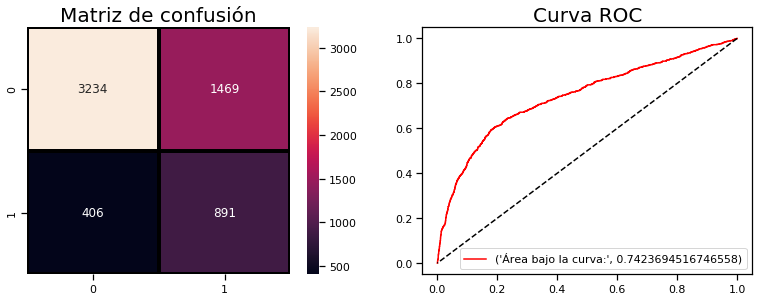

In [0]:
metrics = Metrics(gsGaussianNB.best_estimator_,X_test,Y_test)
printMetrics(gsGaussianNB)

**Sensibilidad** = tp / (tp + fn)


**Especificidad**  = tn /(tn+fp)


**eficiencia** = tp+tn/(tp+tn+fp+fn)


**Precisión** = tp /(tp+fp)




## **Random Forest**

[Documentación](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html)

In [0]:
from sklearn.ensemble import RandomForestClassifier

VALID_SIZE = 0.20
FOLDS = 10

"""
params = { 
    'n_estimators': [50,100,150,200,250,300],
     "max_features": [1,2,3,4,5,6,7,8,9,10],
     'max_depth': [1,2,3,4,5,6,7,8,9],
    'criterion' :['gini', 'entropy']
}
"""
params = { 
    'n_estimators': [10,20,30,40,50],
     "max_features": [1,2,3,4,5],
     'max_depth': [1,2,3,4,5,8,10,15,20],
    'criterion' :['gini', 'entropy']
}


rfc=RandomForestClassifier()

gsRDF,X_test,Y_test= modelTrain(rfc,params,X,Y,VALID_SIZE,FOLDS)

print("Best SCORE",gsRDF.best_score_)
print("Best ESTIMATOR", gsRDF.best_params_)


#GUARDAR MODELO
PATH_gsRDF_MODEL = PATH+'Models/gsRDF.pkl'
joblib.dump(gsRDF,PATH_gsRDF_MODEL)

Best SCORE 0.8196666666666667
Best ESTIMATOR {'criterion': 'entropy', 'max_depth': 8, 'max_features': 5, 'n_estimators': 50}


['/content/drive/My Drive/2019-1/Simulation of System and Laboratory/Final Project/Code/Models/gsRDF.pkl']

### **Resultado Obtenidos**

Recuerde que como parte de una correcta metodolog ́ıa de validacion se deben incluir, seg  ́ un sea el caso, medidas de sensibilidad, especificidad, eficiencia, matriz de confusion, error cuadratico medio, MAPE, coeficiente de determinacion, etc., Deben incluir intervalos de confianza para todas las medidas usadas.

Accuracy:  0.8263333333333334 


classification report :
               precision    recall  f1-score   support

           0       0.84      0.95      0.90      4697
           1       0.69      0.36      0.48      1303

    accuracy                           0.83      6000
   macro avg       0.77      0.66      0.69      6000
weighted avg       0.81      0.83      0.80      6000

     mean_test_score  std_test_score  mean_train_score  std_train_score
0           0.777792        0.000136          0.777792         0.000015
1           0.777792        0.000136          0.777792         0.000015
2           0.777792        0.000136          0.777792         0.000015
3           0.777792        0.000136          0.777792         0.000015
4           0.777792        0.000136          0.777792         0.000015
5           0.778750        0.002920          0.778380         0.001759
6           0.778083        0.000817          0.778028         0.000716
7           0.777792        0.000136   

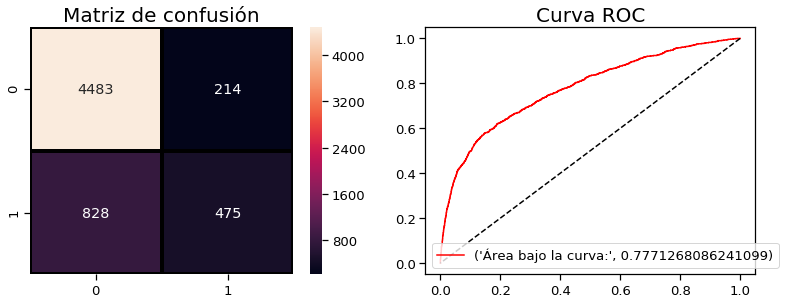

In [0]:
metrics = Metrics(gsRDF.best_estimator_,X_test,Y_test)
printMetrics(gsRDF)

In [0]:
#READ MODEL 

PATHRDFMODEL = PATH+'Models/gsRDF.pkl'
gsRDF = joblib.load(PATHRDFMODEL)



 ---




## K vecinos mas cercanos

[Documentación](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html)

In [0]:
from sklearn.neighbors import KNeighborsClassifier

VALID_SIZE = 0.20
FOLDS = 10
params = {
    'n_neighbors':[3,5,7,9,11],
    'metric':['minkowski','euclidean','manhattan']
    
    
}
KNN = KNeighborsClassifier()


gsKNN,X_test,Y_test = modelTrain(KNN,params,X,Y,VALID_SIZE,FOLDS)


Best SCORE 0.8088333333333333


AttributeError: ignored

In [0]:
#Leer MODELO
PATH_knn_MODEL = PATH+'Models/gsKNN.pkl'
gsKNN = joblib.load(PATH_knn_MODEL)

print("Best SCORE",gsKNN.best_score_)
print("Best ESTIMATOR", gsKNN.best_params_)



Best SCORE 0.8088333333333333
Best ESTIMATOR {'metric': 'minkowski', 'n_neighbors': 11}


### **Resultado Obtenidos**

Recuerde que como parte de una correcta metodolog ́ıa de validacion se deben incluir, seg  ́ un sea el caso, medidas de sensibilidad, especificidad, eficiencia, matriz de confusion, error cuadratico medio, MAPE, coeficiente de determinacion, etc., Deben incluir intervalos de confianza para todas las medidas usadas.

In [0]:
PATHgsKNNMODEL = PATH+'Models/gsKNN.pkl'
gsKNN = joblib.load(PATHgsKNNMODEL)


metrics = Metrics(gsKNN.best_estimator_,X_test,Y_test)
printMetrics(gsKNN)

NameError: ignored



---




## **Redes Neuronales Artificiales**

### **Resultado Obtenidos**

Recuerde que como parte de una correcta metodolog ́ıa de validacion se deben incluir, seg  ́ un sea el caso, medidas de sensibilidad, especificidad, eficiencia, matriz de confusion, error cuadratico medio, MAPE, coeficiente de determinacion, etc., Deben incluir intervalos de confianza para todas las medidas usadas.



 ---




## **Maquinas de Soporte Vectorial con kernel lineal y con kernel RBF.**

In [0]:
from sklearn.svm import SVC

VALID_SIZE = 0.20
FOLDS = 10

Cs = [0.001, 0.01, 0.1, 1, 10]
gammas = [0.001, 0.01, 0.1, 1]
kernels = ['rbf','linear']

params = {'C': Cs, 'gamma' : gammas,'kernel':kernels}
svm = SVC()
gsSVM = modelTrain(svm,params,X,Y,VALID_SIZE,FOLDS)

print("Best SCORE",gsSVM.best_score_)
print("Best ESTIMATOR", gsSVM.best_params_)



#GUARDAR MODELO
PATH_svm_MODEL = PATH+'Models/gsSVM.pkl'
joblib.dump(gsSVM,PATH_svm_MODEL)


### **Resultado Obtenidos**

Recuerde que como parte de una correcta metodolog ́ıa de validacion se deben incluir, seg  ́ un sea el caso, medidas de sensibilidad, especificidad, eficiencia, matriz de confusion, error cuadratico medio, MAPE, coeficiente de determinacion, etc., Deben incluir intervalos de confianza para todas las medidas usadas.



 ---




In [0]:
PATHMODEL = PATH+'Models/gsSVM_CSFull_rbf2y3.pkl'
gsMODEL= joblib.load(PATHMODEL)

print("Best SCORE",gsMODEL.best_score_)
print("Best ESTIMATOR", gsMODEL.best_params_)

#metrics = Metrics(gsMODEL.best_estimator_,X_test,Y_test)
#printMetrics(gsMODEL)

Best SCORE 0.8188333333333333
Best ESTIMATOR {'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}


# **Realice un analisis individual de cada una de las caracteristicas**

Realice un analisis individual de cada una de las caracteristicas a partir de medidas de correlacion y del indice de Fisher (segun sea el caso). Identifique de acuerdo con este analisis, ¿cu  ́ ales son las caracter  ́  ́ısticas candidatas a ser eliminadas?



1. RandomForestClassifier 


Best SCORE 0.8196666666666667
Best ESTIMATOR {'criterion': 'entropy', 'max_depth': 8, 'max_features': 5, 'n_estimators': 50}


2. Redes Neuronales Artificiales

Best SCORE 0.8197083333333334
Best ESTIMATOR {'activation': 'logistic', 'alpha': 0.01, 'hidden_layer_sizes': 72, 'max_iter': 300, 'solver': 'adam'}

3. Maquinas de Soporte Vectorial 

Best SCORE 0.8188333333333333
Best ESTIMATOR {'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}





### RandomForestClassifier

In [0]:
PATHMODEL = PATH+'Models/gsRDF.pkl'
gsMODEL= joblib.load(PATHMODEL)

print("Best SCORE",gsMODEL.best_score_)
print("Best ESTIMATOR", gsMODEL.best_params_)

#print('Results', gsMODEL.cv_results_)

#metrics = Metrics(gsMODEL.best_estimator_,X_test,Y_test)
#printMetrics(gsMODEL)

Best SCORE 0.8196666666666667
Best ESTIMATOR {'criterion': 'entropy', 'max_depth': 8, 'max_features': 5, 'n_estimators': 50}


## Selección de características

**Realice seleccion de características por el metodo de busqueda secuencial ascendente o descendente y eval  ́ ue ́
nuevamente en los 3 mejores modelos evaluados. Para
realizar este punto cada grupo debe decidir la funcion ́
criterio a usar, justificando su decision. Incluya una tabla  ́
con los resultados, indicando el porcentaje de reduccion ́
alcanzado y las demas medidas de desempe  ́ no. Recuerde  ̃
incluir en el informe cual fue el criterio de selecci  ́ on ́
usado y porque. ́**

In [106]:
from sklearn.model_selection import train_test_split
VALID_SIZE = 0.20
X, X_test, Y, y_test = train_test_split(X,Y, test_size=VALID_SIZE, shuffle=True )

In [27]:
#!pip install mlxtend
def classification_error(y_est, y_real):
    err = 0
    for y_e, y_r in zip(y_est, y_real):

        if y_e != y_r:
            err += 1

    return err/np.size(y_est)

In [108]:
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
import time
def select_features(modelo, n_features, fwd, fltg):
   
#sfs  -> forward=True,   floating=False 
#sbs  -> forward=False,   floating=False 
#sffs -> forward=True,   floating=True
#sbfs -> forward=False,   floating=True

    sfs = SFS(modelo, 
           k_features=n_features, 
           forward=fwd,
           floating=fltg,
           verbose=1,
           scoring='accuracy',
           cv=0,
           n_jobs=-1)    
    return sfs

In [109]:
from sklearn.model_selection import StratifiedKFold
def implementationSelectionFeatures(model,n_features,forward,floating):
    #Para calcular el costo computacional
    tiempo_i = time.time()  
    Errores = np.ones(10)
    j = 0
    FOLDS = 10
    skf = StratifiedKFold(n_splits=FOLDS)
    
    for train_index, test_index in skf.split(X, Y):
        X_train, X_test = X.values[train_index], X.values[test_index]
        y_train, y_test = Y.values[train_index], Y.values[test_index]  
        
        sf = select_features(model, n_features, forward, floating) 

        sf.fit(X_train, y_train)#Complete el código aquí

        Errores[j] = 1-sf.k_score_

        j+=1

    print("\nError de validación aplicando SFS: " + str(np.mean(Errores)) + " +/- " + str(np.std(Errores)))

    print("\nEficiencia en validación aplicando SFS: " + str(sf.k_score_*100) + "%" )

    print ("\n\nTiempo total de ejecución: " + str(time.time()-tiempo_i) + " segundos.")

    tiempo = time.time()-tiempo_i
        
    return np.mean(Errores),np.std(Errores),tiempo,sf.k_feature_idx_
        #print str(ypred)
        #print str(y_test)  


In [31]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier

def getModel(nameModel):
  model = ''  
  if nameModel == 'RDF':
    model = RandomForestClassifier(criterion = 'entropy', max_depth= 8, max_features= 0.21, n_estimators= 50)
    
  if nameModel == 'RNA':    
    model = MLPClassifier(activation = 'logistic', alpha = 0.01, hidden_layer_sizes = 72, max_iter = 300, solver = 'adam')
    
  if nameModel == 'SVM':
    model = SVC(C =  1, gamma = 0.1, kernel ='rbf')    
  return model

# RDF

In [0]:
erroresA = []
stdsA  = []
tiemposA = []
k_feature_idx_A = []


import pandas as pd
import qgrid
df_types = pd.DataFrame({
    'Modelo' : pd.Series(['RDF']*5),
    '# de características seleccionadas' : pd.Series([10]*1),
    'Fordward':pd.Series([True]*5)

   })
df_types.set_index(['Modelo','# de características seleccionadas','Fordward'], inplace=True)

for i in df_types.index:  
  
  
  model = getModel(str(i[0]))
  tiempos,errores,stds,k_feature_idx_ = implementationSelectionFeatures(model,int(i[1]),i[2],False)
  
  erroresA.append(errores)
  stdsA.append(stds)
  tiemposA.append(tiempos)
  k_feature_idx_A.append(k_feature_idx_)
  
  
  
  print('N-FEATURES: ', str(i[1]))
  print("Indices ",k_feature_idx_)
  
  df_types["Error de validación"] = ""
  df_types["IC(std)"] = ""
  df_types["Tiempo de ejecución"] = ""  
  df_types["Indices de caracteristicas"] = ""
  
  
  df_types["Error de validación"][i] = errores
  df_types["IC(std)"][i]= stds
  df_types["Tiempo de ejecución"][i] = tiempos
  df_types["Indices de caracteristicas"][i] = k_feature_idx_  
  
  
  #df_types.sort_index(inplace=True)
#qgrid_widget = qgrid.show_grid(df_types, show_toolbar=False)
#qgrid_widget
#qgrid_widget.get_changed_df()

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  23 out of  23 | elapsed:   17.6s finished
Features: 1/10[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  22 out of  22 | elapsed:   13.8s finished
Features: 2/10[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  21 out of  21 | elapsed:   20.0s finished
Features: 3/10[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:   15.8s finished
Features: 4/10[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  19 out of  19 | elapsed:   13.7s finished
Features: 5/10[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  18 out of  18 | elapsed:   12.0s finished
Features: 6/10[Parallel(


Error de validación aplicando SFS: 0.16576390289087906 +/- 0.001057135201549656

Eficiencia en validación aplicando SFS: 83.49613443822045%


Tiempo total de ejecución: 1502.729489326477 segundos.
N-FEATURES:  10.0
Indices  (1, 4, 5, 6, 9, 11, 14, 16, 17, 18)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  23 out of  23 | elapsed:   16.8s finished
Features: 1/13[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  22 out of  22 | elapsed:   13.3s finished
Features: 2/13[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  21 out of  21 | elapsed:   19.5s finished
Features: 3/13[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:   15.7s finished
Features: 4/13[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  19 out of  19 | elapsed:   13.6s finished
Features: 5/13[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  18 out of  18 | elapsed:   13.7s finished
Features: 6/13[Parallel(


Error de validación aplicando SFS: 0.16519448223624736 +/- 0.001174457062972763

Eficiencia en validación aplicando SFS: 83.53779917596408%


Tiempo total de ejecución: 1918.842645406723 segundos.
N-FEATURES:  13.0
Indices  (1, 4, 5, 6, 7, 9, 11, 14, 15, 16, 18, 19, 22)


[Parallel(n_jobs=1)]: Done  23 out of  23 | elapsed:   16.8s finished
Features: 1/15[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  22 out of  22 | elapsed:   13.2s finished
Features: 2/15[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  21 out of  21 | elapsed:   19.6s finished
Features: 3/15[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:   15.4s finished
Features: 4/15[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  19 out of  19 | elapsed:   13.4s finished
Features: 5/15[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  18 out of  18 | elapsed:   14.5s finished
Features: 6/15[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(

In [0]:
erroresA = []
stdsA  = []
tiemposA = []
k_feature_idx_A = []


import pandas as pd
import qgrid
df_types = pd.DataFrame({
    'Modelo' : pd.Series(['RDF']*5),
    '# de características seleccionadas' : pd.Series([13,15,18,20]*1),
    'Fordward':pd.Series([True]*5)

   })
df_types.set_index(['Modelo','# de características seleccionadas','Fordward'], inplace=True)

for i in df_types.index:  
  
  
  model = getModel(str(i[0]))
  tiempos,errores,stds,k_feature_idx_ = implementationSelectionFeatures(model,int(i[1]),i[2],False)
  
  erroresA.append(errores)
  stdsA.append(stds)
  tiemposA.append(tiempos)
  k_feature_idx_A.append(k_feature_idx_)
  
  
  
  print('N-FEATURES: ', str(i[1]))
  print("Indices ",k_feature_idx_)
  
  df_types["Error de validación"] = ""
  df_types["IC(std)"] = ""
  df_types["Tiempo de ejecución"] = ""  
  df_types["Indices de caracteristicas"] = ""
  
  
  df_types["Error de validación"][i] = errores
  df_types["IC(std)"][i]= stds
  df_types["Tiempo de ejecución"][i] = tiempos
  df_types["Indices de caracteristicas"][i] = k_feature_idx_  
  
  
  #df_types.sort_index(inplace=True)
qgrid_widget = qgrid.show_grid(df_types, show_toolbar=False)
qgrid_widget
qgrid_widget.get_changed_df()

ModuleNotFoundError: ignored

## Evaluación del modelo con menos características


In [0]:
# SACAR EL X_TEST Y X_TRAIN , Y_TRAIN Y Y_TEST de los indices de las variables mas importantes

#X_test,y_test

#X,Y

In [0]:
from sklearn.ensemble import RandomForestClassifier

FOLDS = 10

params = { 
    'n_estimators': [50],
     "max_features": [0.21],
     'max_depth': [8],
    'criterion' :['entropy']
}

rfc=RandomForestClassifier()

gsRDF,X_test,Y_test= modelTrain(rfc,params,X,Y,VALID_SIZE,FOLDS)

print("Best SCORE",gsRDF.best_score_)
print("Best ESTIMATOR", gsRDF.best_params_)

#GUARDAR MODELO

PATH_gsRDF_MODEL = PATH+'Models/Best Models Seleccion y Extraccion Carateristicas/RDF.pkl'
joblib.dump(gsRDF,PATH_gsRDF_MODEL)


metrics = Metrics(gsRDF.best_estimator_,X_test,y_test)
printMetrics(gsRDF)


NameError: ignored

# RNA

In [0]:
erroresA = []
stdsA  = []
tiemposA = []
k_feature_idx_A = []


import pandas as pd
import qgrid
df_types = pd.DataFrame({
    'Modelo' : pd.Series(['RNA']*10),
    '# de características seleccionadas' : pd.Series([10,13,15,18,20]*2),
    'Fordward':pd.Series([True]*5+[False]*5)

   })
df_types.set_index(['Modelo','# de características seleccionadas','Fordward'], inplace=True)

for i in df_types.index:  
 
 
  model = getModel(str(i[0]))
  tiempos,errores,stds,k_feature_idx_ = implementationSelectionFeatures(model,int(i[1]),i[2],False)
 
  erroresA.append(errores)
  stdsA.append(stds)
  tiemposA.append(tiempos)
  k_feature_idx_A.append(k_feature_idx_)
 
 
 
  print('N-FEATURES: ', str(i[1]))
  print("Indices ",k_feature_idx_)
 
  df_types["Error de validación"] = ""
  df_types["IC(std)"] = ""
  df_types["Tiempo de ejecución"] = ""  
  df_types["Indices de caracteristicas"] = ""
 
 
  df_types["Error de validación"][i] = errores
  df_types["IC(std)"][i]= stds
  df_types["Tiempo de ejecución"][i] = tiempos
  df_types["Indices de caracteristicas"][i] = k_feature_idx_  
 
 
  #df_types.sort_index(inplace=True)
qgrid_widget = qgrid.show_grid(df_types, show_toolbar=False)
qgrid_widget
qgrid_widget.get_changed_df()


# SVM

In [ ]:
erroresA = []
stdsA  = []
tiemposA = []
k_feature_idx_A = []


import pandas as pd
#import qgrid
df_types = pd.DataFrame({
    'Modelo' : pd.Series(['SVM']*5),
    '# de características seleccionadas' : pd.Series([10,13,15,18,20]*1),
    'Fordward':pd.Series([False]*5)

   })
df_types.set_index(['Modelo','# de características seleccionadas','Fordward'], inplace=True)

for i in df_types.index:  
 
 
  model = getModel(str(i[0]))
  tiempos,errores,stds,k_feature_idx_ = implementationSelectionFeatures(model,int(i[1]),i[2],False)
 
  erroresA.append(errores)
  stdsA.append(stds)
  tiemposA.append(tiempos)
  k_feature_idx_A.append(k_feature_idx_)
 
  print('Fordward',str(i[2]))
 
  print('N-FEATURES: ', str(i[1]))
  print("Indices ",k_feature_idx_)
 
  df_types["Error de validación"] = ""
  df_types["IC(std)"] = ""
  df_types["Tiempo de ejecución"] = ""  
  df_types["Indices de caracteristicas"] = ""
 
 
  df_types["Error de validación"][i] = errores
  df_types["IC(std)"][i]= stds
  df_types["Tiempo de ejecución"][i] = tiempos
  df_types["Indices de caracteristicas"][i] = k_feature_idx_  
 
 
  #df_types.sort_index(inplace=True)
#qgrid_widget = qgrid.show_grid(df_types, show_toolbar=False)
#qgrid_widget
#qgrid_widget.get_changed_df()


# Extracción con PCA

In [28]:
from mlxtend.feature_extraction import PrincipalComponentAnalysis as PCA
from sklearn.model_selection import StratifiedKFold
import time

def extract_features(tipo, n):
    
    if tipo == 'pca':
    
        ext = PCA(n_components=n)
    
        return ext

    elif tipo == 'lda':
        
        ext = LDA(n_discriminants=n)
        
        return ext
    
    else:
        print ("Ingrese un método válido (pca o lda)\n")

In [35]:
def extraccion(tecnica, clf, n, X,Y):
  #Para calcular el costo computacional
  tiempo_i = time.time()

  #Estandarizamos los datos
  X_extrac = X.copy()
  Y_extrac= Y.copy()
  Y_extrac = Y_extrac.values.reshape(np.size(Y_extrac,0),1)

  print(X_extrac.shape, Y_extrac.shape)

  #Implemetamos la metodología de validación cross validation con 10 folds

  Errores = np.ones(10)
  j = 0
  kf =StratifiedKFold(n_splits=10)

  

  for Mtrain_index, Mtest_index in kf.split(X_extrac,Y_extrac):   
#       #Aquí se aplica la extracción de características por PCA
#       #Complete el código

        ex = extract_features(tecnica,n)#Complete el código llamando el método extract_features. Tenga en cuenta lo que le pide el ejercicio 3.1

#       #Fit de PCA
        ex = ex.fit(X_extrac)#Complete el código con el fit correspondiente

#       #Transforme las variables y genere el nuevo espacio de características de menor dimensión
        X_ex = ex.transform(X_extrac)#complete el código aquí para hacer la transformación
   
        X_ex = X_ex.values
#       #Auí se aplica la extracción de características por LDA

#       #OPCIONAL
#       '''
#       ex = #Complete el código llamando el método extract_features.Tenga en cuenta lo que le pide el ejercicio 3.1

#       #Fit de LDA
#       ex = #Complete el código con el fit correspondiente

#       #Transforme las variables y genere el nuevo espacio de características de menor dimensión
#       X_ex = #complete el código aquí para hacer la transformación
#       '''

#       #Se aplica CV-10
        
#       trainxI =np.array(Mtrain_index)
#       trainxI.reshape(len(trainxI),1)
        
#       testxI =np.array(Mtest_index)
#       testxI.reshape(len(testxI),1)

        
        x_train, x_test = X_ex[Mtrain_index], X_ex[Mtest_index]
        y_train, y_test = Y_extrac[Mtrain_index], Y_extrac[Mtest_index]  

#       #Aquí se entrena y se valida el modelo luego de aplicar extracción de características con PCA o LDA

#       ######

#       # Entrenamiento el modelo.
        model = clf.fit(x_train,y_train)

#       # Validación del modelo
        ypred = model.predict(x_test)

#       #######

        Errores[j] = classification_error(ypred, y_test)
        j+=1

  
  tiempo = time.time()-tiempo_i
  error = np.mean(Errores)
  eficiencia = (1-np.mean(Errores))*100
  IC = np.std(Errores)
  print("\nError de validación aplicando extracción: " + str(error) + " +/- " + str(IC))

  print("\nEfic2401iencia en validación aplicando extracción: " + str(eficiencia) + "%" )

  print ("\n\nTiempo total de ejecución: " + str(tiempo) + " segundos.")
  
  return tiempo, error, IC

# RDF-SVM-RNA ESTA ES!!!!!!!!!!!!!!!!!!!!!!!!

In [ ]:
import pandas as pd
#import qgrid
df_types = pd.DataFrame({
    'Modelo' : pd.Series(['RDF','SVM','RNA']*5),
    '# de características seleccionadas' : pd.Series([10,13,15,18,20]*3),

   })
df_types.set_index(['Modelo','# de características seleccionadas'], inplace=True)

for i in df_types.index:  
  
    
  modelo = getModel(str(i[0]))

  print('MODEL: ',str(i[0]))  
  print('N-FEATURES: ', str(i[1]))

  tiempos,errores,stds =  extraccion('pca', modelo,int(i[1]), X,Y)
  

  
  df_types["Error de validación"] = ""
  df_types["IC(std)"] = ""
  df_types["Tiempo de ejecución"] = ""  
  df_types["Indices de caracteristicas"] = ""  
  
  df_types["Error de validación"][i] = errores
  df_types["IC(std)"][i]= stds
  df_types["Tiempo de ejecución"][i] = tiempos
  
  
  #df_types.sort_index(inplace=True)
  #qgrid_widget = qgrid.show_grid(df_types, show_toolbar=False)
  #qgrid_widget
  #qgrid_widget.get_changed_df()

MODEL:  RDF
N-FEATURES:  10
(30000, 23) (30000, 1)


/home/jose_arangos/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
/home/jose_arangos/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
/home/jose_arangos/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
/home/jose_arangos/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
/home/jose_arangos/anaconda3/lib/python3.5/site-


Error de validación aplicando extracción: 0.19643175071834268 +/- 0.006878278126862137

Efic2401iencia en validación aplicando extracción: 80.35682492816574%


Tiempo total de ejecución: 33.23460268974304 segundos.
MODEL:  SVM
N-FEATURES:  13
(30000, 23) (30000, 1)


/home/jose_arangos/anaconda3/lib/python3.5/site-packages/sklearn/utils/validation.py:752: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
